In [46]:
import pandas as pd
import rocketxg.plotting as rplot

In [47]:
data = pd.read_parquet("../data/test.parquet")
data

,is_goal,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,op_0_pos_x,op_0_pos_y,op_0_pos_z,...,op_2_vel_y,op_2_vel_z,op_2_boost_amount,shooter_pos_x,shooter_pos_y,shooter_pos_z,shooter_vel_x,shooter_vel_y,shooter_vel_z,shooter_boost_amount
0,False,-3479.000000,3409.399902,199.820007,2507.830078,1566.449951,557.640015,-3020.050049,1267.489990,82.070000,...,1352.770020,50.410000,54.901962,-3645.570068,3247.340088,130.580002,1062.729980,1707.540039,365.660004,54.900764
1,False,-1530.729980,3634.350098,283.440002,1387.880005,1029.930054,27.040001,-897.739990,4770.250000,17.010000,...,-0.270000,-45.400002,48.235294,-1686.689941,3602.550049,201.009995,1214.890015,-495.359985,352.179993,41.437141
2,False,-2559.399902,-1047.469971,108.610001,1411.670044,3120.129883,321.779999,-889.219971,-1739.239990,49.279999,...,2009.760010,0.010000,3.122463,-2702.780029,-1229.170044,50.650002,1586.339966,620.669983,244.710007,63.375969
3,False,-347.200012,4387.490234,1077.109985,1279.170044,1576.699951,-1246.699951,1911.219971,2604.639893,17.010000,...,238.970001,0.260000,50.980392,-436.890015,4251.250000,1204.619995,-129.130005,1807.920044,-311.320007,0.000000
4,False,-3012.729980,707.010010,1330.560059,1428.689941,3094.719971,-511.540009,3281.969971,-4159.100098,17.010000,...,63.360001,0.260000,100.000000,-3106.429932,557.940002,1277.170044,1040.420044,1845.930054,151.860001,25.349110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,False,3805.709961,3676.120117,1283.930054,305.320007,2456.820068,227.419998,2969.879883,510.850006,88.510002,...,16.530001,0.850000,92.941177,3790.030029,3483.389893,1235.469971,-411.980011,2244.550049,169.360001,40.784313
3446,False,1641.130005,4246.660156,124.930000,-1460.890015,1434.900024,96.440002,1555.650024,4354.509766,123.820000,...,254.559998,-118.860001,72.941177,1752.930054,4049.030029,85.879997,-110.790001,1539.280029,307.549988,95.686279
3447,False,1274.239990,2618.310059,451.769989,-1871.400024,2914.139893,169.539993,-963.530029,3282.979980,17.020000,...,1066.010010,63.060001,0.000000,1329.760010,2534.810059,317.390015,-356.359985,2061.239990,112.489998,79.119278
3448,False,1694.829956,4308.799805,630.820007,-1055.660034,640.849976,460.200012,1267.699951,4527.810059,573.049988,...,2166.000000,0.440000,3.529412,1805.810059,4272.939941,478.790009,-691.760010,355.170013,632.479980,5.998270


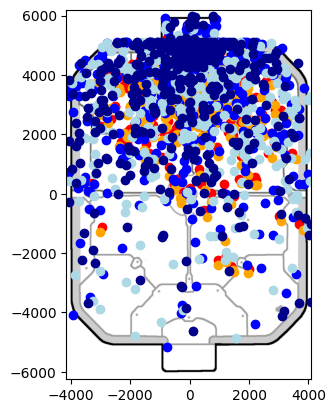

In [48]:
fig, ax = rplot.plot_field()
shot_ind = 100
shot = data[data["is_goal"]]
ax.scatter(shot["ball_pos_x"], shot["ball_pos_y"], color="red")
ax.scatter(shot["shooter_pos_x"], shot["shooter_pos_y"], color="orange")
ax.scatter(shot["op_0_pos_x"], shot["op_0_pos_y"], color="blue")
ax.scatter(shot["op_1_pos_x"], shot["op_1_pos_y"], color="lightblue")
ax.scatter(shot["op_2_pos_x"], shot["op_2_pos_y"], color="darkblue")

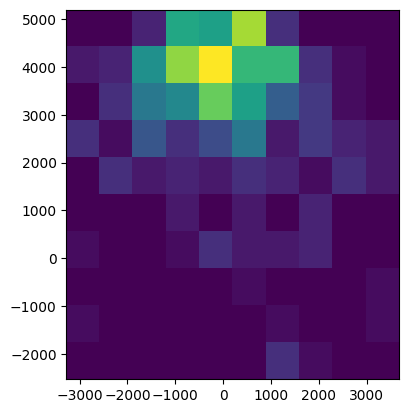

In [49]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

# Generate some test data
x = shot["ball_pos_x"]
y = shot["ball_pos_y"]

heatmap, xedges, yedges = np.histogram2d(x, y, bins=10)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

C:\Users\Violet\AppData\Local\Temp\ipykernel_24880\1873790216.py:5: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


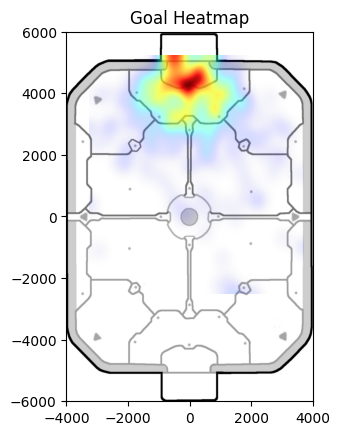

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from scipy.ndimage.filters import gaussian_filter

# Choose colormap
cmap = cm.jet

# Get the colormap colors
my_cmap = cmap(np.arange(cmap.N))

# Set alpha
my_cmap[:,-1] = np.linspace(0, 1, cmap.N)

# Create new colormap
my_cmap = ListedColormap(my_cmap)


def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


# Generate some test data
shot = data[data["is_goal"]]
x = shot["ball_pos_x"]
y = shot["ball_pos_y"]

sigma = 32
fig, ax = rplot.plot_field()
img, extent = myplot(x, y, sigma)
ax.imshow(img, extent=extent, origin='lower', cmap=my_cmap)
# ax.scatter(shot["ball_pos_x"], shot["ball_pos_y"])
ax.set_title("Goal Heatmap")
ax.set_xlim(-4000, 4000)
ax.set_ylim(-6000, 6000)

plt.show()

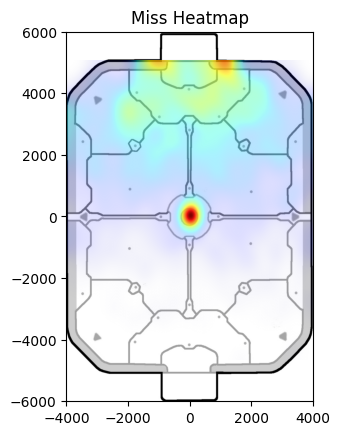

In [51]:
# Generate some test data
shot = data[~data["is_goal"]]
x = shot["ball_pos_x"]
y = shot["ball_pos_y"]

sigma = 32
fig, ax = rplot.plot_field()
img, extent = myplot(x, y, sigma)
ax.imshow(img, extent=extent, origin='lower', cmap=my_cmap)
# ax.scatter(shot["ball_pos_x"], shot["ball_pos_y"])
ax.set_title("Miss Heatmap")
ax.set_xlim(-4000, 4000)
ax.set_ylim(-6000, 6000)

plt.show()